In [ ]:
pip install Turicreate

In [3]:
import re
import turicreate as tc
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import string
import random
import json

In [4]:
import gc
import time
import seaborn as sns
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

#Using Processed Dataset

In [133]:
fashion_dataset = tc.SFrame.read_json('/content/drive/My Drive/fashion_dataset.json',orient='lines')

Finished parsing file /content/drive/My Drive/fashion_dataset.json

Parsing completed. Parsed 100 lines in 1.29855 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[dict]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/fashion_dataset.json

Parsing completed. Parsed 8460 lines in 1.38761 secs.

In [134]:
fashion_dataset['rank'][11]

'[">#3,664,987 in Home & Kitchen (See Top 100 in Home & Kitchen)",">#13,321 in Home & Kitchen > Bath > Bathroom Accessories > Shower Curtains, Hooks & Liners > Shower Curtain Sets"]'

In [135]:
fashion_dataset

ATV,Accents,Accessories,Accessory,Active,Alternative,Amazon,Apparel,Aprons,Arts,Athletic,Automotive
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
def Filtering_rank(s):
  if s == []:
    return 3188137
  return int(s[0])
  
def Filtering_brand(s):
  if s.lower() == '' or s.lower() == 'unknown':
    return 'Unknown'
  return s

In [137]:
fashion_dataset['Rank'] = fashion_dataset['Rank'].apply(Filtering_rank)
fashion_dataset['brand'] = fashion_dataset['brand'].apply(Filtering_brand)

In [138]:
def remove_punctuation(text):
    translator = text.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

In [139]:
Title_without_punctuation = fashion_dataset['title'].apply(remove_punctuation)
Description_without_punctuation = fashion_dataset['description'].apply(remove_punctuation)
fashion_dataset['title_word_count'] = tc.text_analytics.count_words(Title_without_punctuation)
fashion_dataset['title_tf_idf'] = tc.text_analytics.tf_idf(Title_without_punctuation)
fashion_dataset['description_word_count'] = tc.text_analytics.count_words(Description_without_punctuation)
fashion_dataset['description_tf_idf'] = tc.text_analytics.tf_idf(Description_without_punctuation)

In [140]:
def normalization(n):
  return np.log1p(n)

In [141]:
fashion_dataset['price'] = fashion_dataset['price'].apply(normalization)
fashion_dataset['Rank'] = fashion_dataset['Rank'].apply(normalization)

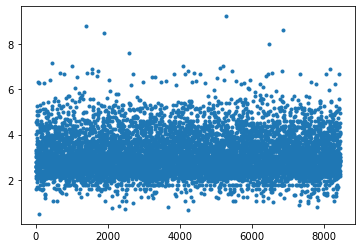

In [142]:
%matplotlib inline
plt.plot(fashion_dataset['price'],'.')

In [143]:
tc.visualization.scatter(fashion_dataset['price'],fashion_dataset['Rank'],title="Relationship Between Rank and Price")

In [144]:
train_validation,test = fashion_dataset.random_split(.9,seed=0)

In [145]:
#removed 'Rank' feature
features = ['brand',
 'rating',
 'title_tf_idf',
 'description_tf_idf',
 'ATV',
 'Accents',
 'Accessories',
 'Accessory',
 'Active',
 'Alternative',
 'Amazon',
 'Apparel',
 'Aprons',
 'Arts',
 'Athletic',
 'Automotive',
 'Baby',
 'Backpacks',
 'Bags',
 'Bands',
 'Bar',
 'Bath',
 'Bathroom',
 'Beading',
 'Beauty',
 'Boas',
 'Bottle',
 'Boxes',
 'Boys',
 'Bracelets',
 'Brooches',
 'Card',
 'Care',
 'Cases',
 'Cats',
 'Cell',
 'Charm',
 'Charms',
 'Chefs',
 'Climbing',
 'Clothing',
 'Coats',
 'Containers',
 'Cooling',
 'Corkscrews',
 'Corsets',
 'Cosplay',
 'Costumes',
 'Craft',
 'Crafts',
 'Crossbody',
 'Cultural',
 'Curtain',
 'Curtains',
 'Dcor',
 'Decorative',
 'Dining',
 'Dogs',
 'Down',
 'Dress',
 'Dressing',
 'Earrings',
 'Eastern',
 'Electronics',
 'Fan',
 'Fans',
 'Feather',
 'Feathers',
 'Food',
 'Footwear',
 'Furniture',
 'Gadgets',
 'Games',
 'Garden',
 'Gear',
 'Girls',
 'Glasses',
 'Grocery',
 'Handbags',
 'Hats',
 'Health',
 'Heating',
 'Helmet',
 'Home',
 'Hooks',
 'Household',
 'Improvement',
 'Industrial',
 'Instruments',
 'Jackets',
 'Jewelry',
 'Keychains',
 'Keyrings',
 'Kids',
 'Kitchen',
 'Launchpad',
 'Lawn',
 'Linens',
 'Liners',
 'Lingerie',
 'Lounge',
 'Luggage',
 'Lunch',
 'Making',
 'Memorials',
 'Men',
 'Mens',
 'Middle',
 'Motorcycle',
 'Musical',
 'Necklaces',
 'Novelty',
 'Office',
 'Openers',
 'Organization',
 'Organizers',
 'Ornaments',
 'Outdoor',
 'Outdoors',
 'Pads',
 'Patio',
 'Pendants',
 'Performance',
 'Personal',
 'Pet',
 'Phones',
 'Pins',
 'Play',
 'Posters',
 'PreKindergarten',
 'Preschool',
 'Pretend',
 'Prints',
 'Products',
 'Props',
 'Protective',
 'Quality',
 'Rain',
 'Recreation',
 'Reusable',
 'Robes',
 'Role',
 'Room',
 'Scientific',
 'Sets',
 'Sewing',
 'Shoe',
 'Shoes',
 'Shop',
 'Shops',
 'Shower',
 'Sleep',
 'Sports',
 'Storage',
 'Stud',
 'Supplies',
 'TShirts',
 'Table',
 'Tabletop',
 'Tees',
 'ToGo',
 'Toddler',
 'Tools',
 'TopHandle',
 'Tops',
 'Totes',
 'Towels',
 'Toys',
 'Traditional',
 'Travel',
 'Trench',
 'Up',
 'Urns',
 'Utensils',
 'Vests',
 'Wall',
 'Wallets',
 'Watch',
 'Watches',
 'Wear',
 'Wine',
 'Women'
 ]

#Liner Model using L-Bfgs

In [146]:
Linear_model= tc.linear_regression.create(train_validation,target='price',features=features,
                                                l1_penalty=0.0,l2_penalty=2800,
                                                validation_set='auto',max_iterations = 1000,lbfgs_memory_level = 100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 7226

Number of features          : 182

Number of unpacked features : 35002

Number of coefficients    : 37288

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 0         | 5        | 0.095638  | 0.481031     | 8.051881           | 5.856202             | 2.003663                        | 2.041909                          |

| 1         | 9        | 2.008406  | 0.849738     | 6.932902           | 6.813030             | 1.502313                        | 1.704723                          |

| 2         | 14       | 1.731497  | 1.315646     | 5.114581           | 6.258783             | 0.996481                        | 1.373095                          |

| 3         | 15       | 1.731497  | 1.470992     | 4.788469           | 5.605710             | 0.743044                        | 1.235317                          |

| 4         | 20       | 1.512230  | 2.148861     | 6.483151           | 5.481293             | 0.573551                        | 1.152877                          |

| 9         | 28       | 1.131280  | 3.413589     | 3.079690           | 5.430839             | 0.274593                        | 1.055027                          |

| 19        | 43       | 1.000000  | 5.688501     | 2.095944           | 5.288641             | 0.167829                        | 1.021383                          |

| 29        | 53       | 1.000000  | 7.475635     | 1.845147           | 5.278610             | 0.175315                        | 0.854596                          |

| 39        | 71       | 0.911261  | 9.743631     | 1.788743           | 5.213486             | 0.137800                        | 0.690521                          |

| 49        | 82       | 1.000000  | 11.399162    | 1.941434           | 5.169261             | 0.129277                        | 0.683078                          |

| 59        | 97       | 1.000000  | 13.052874    | 1.961156           | 5.141357             | 0.128819                        | 0.682027                          |

| 69        | 107      | 1.000000  | 14.374731    | 1.967825           | 5.144150             | 0.128852                        | 0.682011                          |

| 79        | 123      | 1.000000  | 16.332724    | 1.968570           | 5.145303             | 0.128866                        | 0.682048                          |

| 89        | 134      | 1.000000  | 17.833904    | 1.968834           | 5.145341             | 0.128868                        | 0.682051                          |

| 97        | 143      | 1.000000  | 19.146586    | 1.968863           | 5.145363             | 0.128868                        | 0.682050                          |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [147]:
Linear_model.evaluate(test)

{'max_error': 2.986331039458082, 'rmse': 0.5655087159689729}

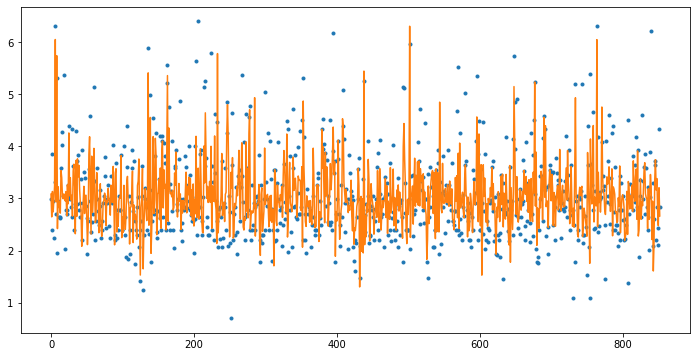

In [148]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 6))
y = test['price']
z = Linear_model.predict(test)

ax.plot(y,'.')
ax.plot(z,'-')

In [149]:
test['price'][:10]


dtype: float
Rows: 10
[2.995732273553991, 2.3969857684155302, 3.849083205654272, 2.9439125248241944, 2.2502386126218363, 3.3141860046725258, 6.307187279715285, 2.70805020110221, 5.30325515557766, 1.9615022438151495]

In [150]:
Linear_model.predict(test[:10])

dtype: float
Rows: 10
[3.083583049916594, 2.6463985949632294, 3.1343094209196525, 2.7426061379274875, 2.970312968127316, 3.2373228578605864, 6.049010924294413, 2.937661635561597, 5.739392196510223, 2.4219151205379763]

#RandomForest_model

In [ ]:
RandomForest_model = tc.random_forest_regression.create(train_validation,target='price',features=features,max_iterations=100,
                                                        validation_set='auto',max_depth = 100 ,min_loss_reduction=0.1)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest regression:

--------------------------------------------------------

Number of examples          : 7226

Number of features          : 183

Number of unpacked features : 34980

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 1.251465     | 5.301235           | 2.645936             | 0.645027                        | 0.729763                          |

| 2         | 2.672183     | 4.641489           | 2.158233             | 0.573172                        | 0.673929                          |

| 3         | 4.134495     | 4.681516           | 2.011499             | 0.555143                        | 0.646588                          |

| 4         | 5.342297     | 4.762711           | 2.000696             | 0.545538                        | 0.630310                          |

| 5         | 6.552493     | 4.488019           | 2.016649             | 0.539352                        | 0.626870                          |

| 10        | 12.904876    | 4.617099           | 2.171459             | 0.521607                        | 0.616873                          |

| 15        | 19.359934    | 4.327023           | 2.092901             | 0.518445                        | 0.600019                          |

| 20        | 26.557857    | 4.348765           | 2.015194             | 0.513811                        | 0.595064                          |

| 25        | 33.351306    | 4.479990           | 1.978804             | 0.512458                        | 0.593710                          |

| 30        | 40.329705    | 4.457719           | 2.081198             | 0.510744                        | 0.595707                          |

| 35        | 47.081194    | 4.504152           | 2.046379             | 0.510420                        | 0.593977                          |

| 40        | 53.299792    | 4.526475           | 2.018854             | 0.510706                        | 0.594508                          |

| 45        | 60.147614    | 4.536355           | 2.122606             | 0.509708                        | 0.594818                          |

| 50        | 65.969936    | 4.528351           | 2.080549             | 0.509622                        | 0.597155                          |

| 55        | 72.600875    | 4.498464           | 2.104081             | 0.509457                        | 0.597551                          |

| 60        | 79.682907    | 4.528484           | 2.140958             | 0.508890                        | 0.595651                          |

| 65        | 85.994969    | 4.566525           | 2.078588             | 0.508620                        | 0.596907                          |

| 70        | 92.421198    | 4.576061           | 2.109781             | 0.508419                        | 0.597596                          |

| 75        | 99.294481    | 4.548850           | 2.024864             | 0.507531                        | 0.596322                          |

| 80        | 106.013026   | 4.554975           | 2.045836             | 0.507099                        | 0.596082                          |

| 85        | 112.109677   | 4.549053           | 2.047463             | 0.506908                        | 0.595925                          |

| 90        | 118.391524   | 4.545186           | 2.044259             | 0.506484                        | 0.594612                          |

| 95        | 124.474466   | 4.575635           | 2.058050             | 0.506361                        | 0.594033                          |

| 100       | 131.280960   | 4.573311           | 2.075331             | 0.506451                        | 0.593853                          |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [ ]:
RandomForest_model.evaluate(test)

{'max_error': 2.575847864151001, 'rmse': 0.604326270393863}

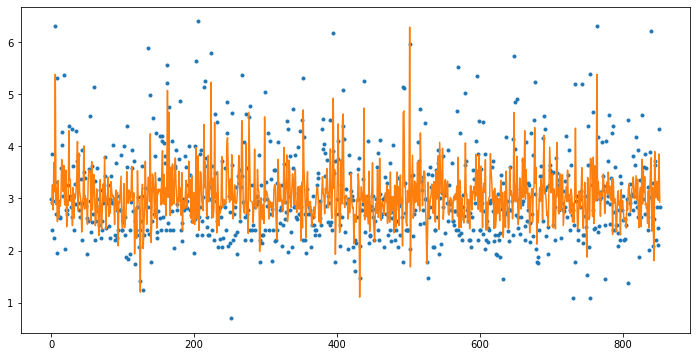

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 6))
y = test['price']
z = RandomForest_model.predict(test)

ax.plot(y,'.')
ax.plot(z,'-')

In [ ]:
test['price'][:10]

dtype: float
Rows: 10
[2.995732273553991, 2.3969857684155302, 3.849083205654272, 2.9439125248241944, 2.2502386126218363, 3.3141860046725258, 6.307187279715285, 2.70805020110221, 5.30325515557766, 1.9615022438151495]

In [ ]:
RandomForest_model.predict(test[:10])

dtype: float
Rows: 10
[2.918569326400757, 2.8830199241638184, 3.260280132293701, 2.7824103832244873, 3.694277048110962, 3.130631446838379, 5.380781650543213, 2.8827576637268066, 3.21022367477417, 2.556824207305908]

#BoostedDecisionTree Model

In [ ]:
Boosted_tree_regression_model = tc.boosted_trees_regression.create(train_validation,target='price',features=features,max_iterations=100,
                                                        validation_set='auto',max_depth = 100,min_loss_reduction=1.3)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees regression:

--------------------------------------------------------

Number of examples          : 7226

Number of features          : 183

Number of unpacked features : 35161

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 1.799452     | 7.220631           | 5.762796             | 1.976285                        | 1.948257                          |

| 2         | 3.715029     | 6.409622           | 5.407601             | 1.443434                        | 1.427864                          |

| 3         | 5.829281     | 5.493380           | 4.926744             | 1.074604                        | 1.091094                          |

| 4         | 8.161827     | 4.717277           | 4.679322             | 0.818450                        | 0.877637                          |

| 5         | 10.649532    | 4.071244           | 4.258290             | 0.642979                        | 0.745259                          |

| 10        | 23.247567    | 1.868702           | 3.507617             | 0.346459                        | 0.604452                          |

| 15        | 34.406657    | 1.576764           | 3.446356             | 0.313010                        | 0.604295                          |

| 20        | 44.511724    | 1.564301           | 3.433893             | 0.312662                        | 0.605700                          |

| 25        | 54.520810    | 1.562206           | 3.431798             | 0.312652                        | 0.605961                          |

| 30        | 64.716723    | 1.561853           | 3.431445             | 0.312651                        | 0.606006                          |

| 35        | 74.847533    | 1.561794           | 3.431386             | 0.312651                        | 0.606013                          |

| 40        | 84.828999    | 1.561784           | 3.431376             | 0.312651                        | 0.606014                          |

| 45        | 94.764323    | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 50        | 104.729499   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 55        | 114.715855   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 60        | 124.670892   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 65        | 134.610670   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 70        | 144.470437   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 75        | 154.443815   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 80        | 164.411836   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 85        | 174.385572   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 90        | 184.277368   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 95        | 194.292686   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

| 100       | 204.258125   | 1.561783           | 3.431374             | 0.312651                        | 0.606015                          |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [ ]:
Boosted_tree_regression_model.evaluate(test)

{'max_error': 2.597667694091797, 'rmse': 0.5782431432184406}

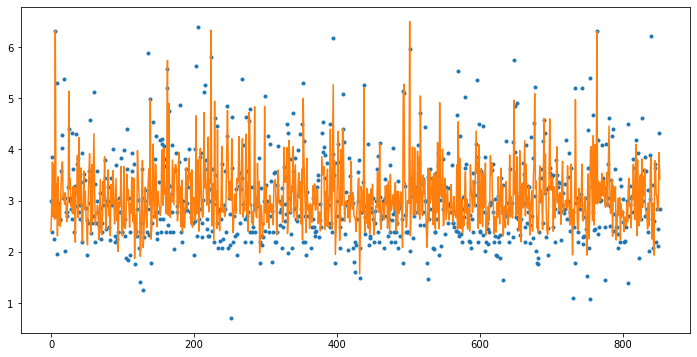

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 6))
y = test['price']
z = Boosted_tree_regression_model.predict(test)

ax.plot(y,'.')
ax.plot(z,'-')

In [ ]:
test['price'][:10]

dtype: float
Rows: 10
[2.995732273553991, 2.3969857684155302, 3.849083205654272, 2.9439125248241944, 2.2502386126218363, 3.3141860046725258, 6.307187279715285, 2.70805020110221, 5.30325515557766, 1.9615022438151495]

In [ ]:
Boosted_tree_regression_model.predict(test[:10])

dtype: float
Rows: 10
[2.401866912841797, 2.9155514240264893, 3.7537174224853516, 2.6819939613342285, 3.6991164684295654, 2.6345980167388916, 6.323568344116211, 2.688764810562134, 3.333620309829712, 2.3126726150512695]

#Result and analysis

In [ ]:
Boosted_tree_regression_model_iterations = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
Boosted_tree_regression_model_training_rmse_error = [1.973752,1.442716,1.073236,0.817303,0.641835,0.345066,0.307437,0.307047,0.307036,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035,0.307035]
Boosted_tree_regression_model_validation_rmse_error = [2.025919,1.511584,1.159919,0.934223,0.791598,0.594969,0.581247,0.580389,0.580274,0.580256,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252,0.580252]
Boosted_tree_regression_model_Elapsed_time = [1.527382,3.354473,5.117402,7.154499,9.386198,21.045217,31.641383,41.976433,52.230472,62.406625,72.571825,82.772485,92.997606,103.311578,113.777986,124.174975,134.606008,145.080096,155.456486,165.666822,175.877503,186.052691,196.261803,206.447614]
RandomForest_model_iterations = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
RandomForest_model_Elapsed_time = [1.097717,2.060333,2.976899,3.915200,5.204549,11.335049,17.096077,23.063158,29.370211,34.616903,40.531313,46.492733,52.175993,57.267989,62.881215,68.825006,74.522118,79.815357,85.608124,91.290332,97.103865,103.157085,108.548765,114.342343]
RandomForest_model_training_rmse_error = [1.78,1.48,1.02,0.825917,0.672758,0.607872,0.542032,0.530024,0.516073,0.513774,0.512268,0.512029,0.511391,0.510922,0.510185,0.509793,0.509482,0.509391,0.509623,0.509889,0.509915,0.509768,0.510160,0.510445]
RandomForest_model_validation_rmse_error = [1.764072,1.577037,1.360287,1.035772,0.814888,0.603096,0.601464,0.592943,0.59142,0.592452,0.588722,0.591406,0.590182,0.589479,0.589626,0.588763,0.587724,0.587834,0.587873,0.588012,0.588677,0.589638,0.590551,0.592265]
Linear_model_iterations = [0,1,2,3,4,9,24,49,74,97]
Linear_Elapsed_time = [0.387561,0.713961,0.969010,1.096820,1.300080,2.258382,4.215570,7.965727,11.515913,15.513607]
Linear_model_training_rmse_error = [1.996778,1.490531,0.988040,0.738720,0.566878,0.270530,0.158168,0.129693,0.129471,0.129476]
Linear_model_validation_rmse_error = [2.007486,1.639827,1.230425,1.047922,0.991010,0.922599,0.875587,0.579956,0.578696,0.548700]

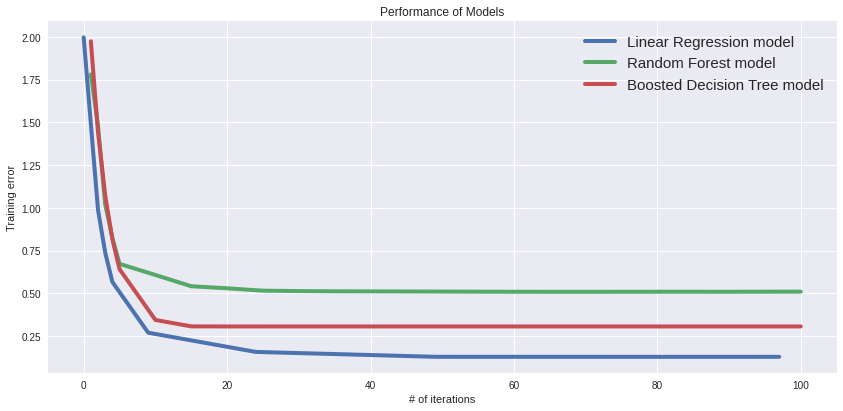

In [ ]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 12, 6
plt.plot(Linear_model_iterations,Linear_model_training_rmse_error, '-', linewidth=4.0, label='Linear Regression model')
plt.plot(RandomForest_model_iterations,RandomForest_model_training_rmse_error, '-', linewidth=4.0, label='Random Forest model')
plt.plot(Boosted_tree_regression_model_iterations,Boosted_tree_regression_model_training_rmse_error, '-', linewidth=4.0, label='Boosted Decision Tree model')
plt.title('Performance of Models')
plt.xlabel('# of iterations')
plt.ylabel('Training error')
plt.rcParams.update({'font.size': 16})
plt.legend(loc='best', prop={'size':15})
plt.tight_layout()

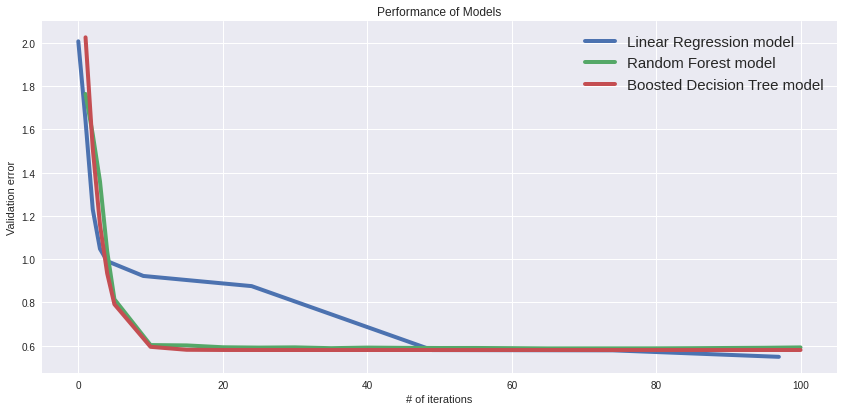

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
plt.plot(Linear_model_iterations,Linear_model_validation_rmse_error, '-', linewidth=4.0, label='Linear Regression model')
plt.plot(RandomForest_model_iterations,RandomForest_model_validation_rmse_error, '-', linewidth=4.0, label='Random Forest model')
plt.plot(Boosted_tree_regression_model_iterations,Boosted_tree_regression_model_validation_rmse_error, '-', linewidth=4.0, label='Boosted Decision Tree model')
plt.title('Performance of Models')
plt.xlabel('# of iterations')
plt.ylabel('Validation error')
plt.rcParams.update({'font.size': 16})
plt.legend(loc='best', prop={'size':15})
plt.tight_layout()

No handles with labels found to put in legend.


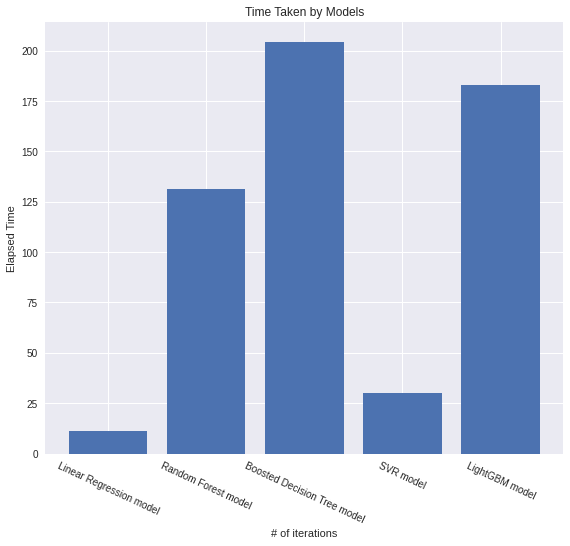

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 6
fig = plt.figure()
ax = fig.add_axes([0,0,0.6,1])
time = [Linear_model.training_time,RandomForest_model.training_time,Boosted_tree_regression_model.training_time,30,183]
models= ["Linear Regression model","Random Forest model","Boosted Decision Tree model","SVR model","LightGBM model"]
ax.bar(models,time)
plt.title('Time Taken by Models')
plt.xlabel('# of iterations')
plt.ylabel('Elapsed Time')
plt.legend(labels  = ["Linear Regression model","Random Forest model","Boosted Decision Tree model"])

plt.rcParams.update({'font.size': 16})
plt.legend(loc='best', prop={'size':10})
for tick in ax.get_xticklabels():
    tick.set_rotation(-25)
plt.show()

#Dataframe Conversion

In [ ]:
dataset = fashion_dataset.to_dataframe()

#Trying Sk-Learn Model

Below Code is Time Consuming

In [ ]:
dataset

,ATV,Accents,Accessories,Accessory,Active,Alternative,Amazon,Apparel,Aprons,Arts,Athletic,Automotive,Baby,Backpacks,Bags,Bands,Bar,Bath,Bathroom,Beading,Beauty,Boas,Bottle,Boxes,Boys,Bracelets,Brooches,Card,Care,Cases,Cats,Cell,Charm,Charms,Chefs,Climbing,Clothing,Coats,Containers,Cooling,...,Storage,Stud,Sub_Category,Supplies,TShirts,Table,Tabletop,Tees,ToGo,Toddler,Tools,TopHandle,Tops,Totes,Towels,Toys,Traditional,Travel,Trench,Up,Urns,Utensils,Vests,Wall,Wallets,Watch,Watches,Wear,Wine,Women,brand,description,price,rank,rating,title,title_word_count,title_tf_idf,description_word_count,description_tf_idf
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,"[Clothing, Shoes, Jewelry]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alex and Ani,Alex and Ani are great jewelry for every occas...,3.338613,"7,015,695 in Clothing, Shoes & Jewelry (",5.00000,"ALEX AND ANI Boston Red Socks Cap Logo, Red En...","{'new': 1.0, 'finish': 1.0, 'silver': 1.0, 'al...","{'new': 4.5887571563467615, 'finish': 5.171903...","{'for': 1.0, 'jewelry': 1.0, 'are': 1.0, 'ani'...","{'for': 0.7383621829594981, 'jewelry': 2.65454..."
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,"[Clothing, Shoes, Jewelry]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Become best pups with Skye and chase. These vi...,2.803360,"230,231 in Clothing, Shoes & Jewelry (",4.71429,Nickelodeon Baby Paw Patrol 4-Piece Pajama Set...,"{'assorted': 1.0, 'set': 1.0, 'pajama': 1.0, '...","{'assorted': 6.152732694704104, 'set': 3.00284...","{'lounging': 1.0, 'for': 1.0, 'chase': 1.0, 'y...","{'lounging': 5.785007914578787, 'for': 0.73836..."
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,"[Clothing, Shoes, Jewelry]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Jessica Simpson Outerwear Plus Size Guide \nSt...,4.543295,"2,540,461 in Clothing, Shoes & Jewelry (",5.00000,Jessica Simpson Womens Plus Size Chevron Quilt...,"{'with': 1.0, 'poly': 1.0, 'down': 1.0, 'women...","{'with': 2.466634883552045, 'poly': 6.20989110...","{'vary': 1.0, 'that': 1.0, 'note': 1.0, 'pleas...","{'vary': 3.190901972825795, 'that': 1.70032526..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,"[Clothing, Shoes, Jewelry]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ZLYC,Material: leather<br><b>Size: width-3.1 inches...,3.044046,"5,377,188 in Clothing, Shoes & Jewelry (",5.00000,ZLYC Handmade Vegetable Tanned Leather Credit ...,"{'brown': 1.0, 'case': 1.0, 'card': 1.0, 'hold...","{'brown': 4.2809305178025125, 'case': 4.489227...","{'philosophy': 1.0, 'been': 1.0, 'something': ...","{'philosophy': 6.0473721790462776, 'been': 3.0..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,"[Clothing, Shoes, Jewelry]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MICHAEL Michael Kors,This smooth and spacious Jet Set Travel Chain ...,3.200712,"1,317,969 in Clothing, Shoes & Jewelry (",4.37500,MICHAEL Michael Kors Womens Jet Set Travel Cha...,"{'funt': 1.0, 'michael': 2.0, 'jet': 1.0, 'cha...","{'funt': 9.04310445260027, 'michael': 11.81522...","{'at': 1.0, 'us': 1.0, 'contact': 1.0, 'websit...","{'at': 2.3889519324170503, 'us': 2.40847109473..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,"[Clothing, Shoes, Jewelry]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,OAKI,Oakiwear Kids Rubber Rain Boots with Easy-On H...,2.995732,"7,402 in Clothing, Shoes & Jewelry (",4.47212,OAKI Kids 

In [ ]:
df = dataset

In [ ]:
df['brand'] = df['brand'].astype('category')

In [ ]:
msk = np.random.rand(len(df)) < 0.8
sk_train = df[msk]
sk_test = df[~msk]
test_new = sk_test.drop('price', axis=1)
y_test = sk_test["price"]
sk_train = sk_train[sk_train.price != 0].reset_index(drop=True)

In [ ]:
nrow_train = sk_train.shape[0]
y = sk_train["price"]
merge: pd.DataFrame = pd.concat([sk_train, test_new])

#Settings

In [ ]:
NUM_BRANDS = 4000
NUM_CATEGORIES = 1000
NAME_MIN_DF = 10
MAX_FEATURES_ITEM_DESCRIPTION = 50000

In [ ]:
cv = CountVectorizer(min_df=NAME_MIN_DF)
X_name = cv.fit_transform(merge['title'])


In [ ]:
tv = TfidfVectorizer(max_features=MAX_FEATURES_ITEM_DESCRIPTION, ngram_range=(1, 3), stop_words='english')
X_description = tv.fit_transform(merge['description'])

In [ ]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(merge['brand'])

In [ ]:
feature_vector = ['Rank',
 'rating',
 'ATV',
 'Accents',
 'Accessories',
 'Accessory',
 'Active',
 'Alternative',
 'Amazon',
 'Apparel',
 'Aprons',
 'Arts',
 'Athletic',
 'Automotive',
 'Baby',
 'Backpacks',
 'Bags',
 'Bands',
 'Bar',
 'Bath',
 'Bathroom',
 'Beading',
 'Beauty',
 'Boas',
 'Bottle',
 'Boxes',
 'Boys',
 'Bracelets',
 'Brooches',
 'Card',
 'Care',
 'Cases',
 'Cats',
 'Cell',
 'Charm',
 'Charms',
 'Chefs',
 'Climbing',
 'Clothing',
 'Coats',
 'Containers',
 'Cooling',
 'Corkscrews',
 'Corsets',
 'Cosplay',
 'Costumes',
 'Craft',
 'Crafts',
 'Crossbody',
 'Cultural',
 'Curtain',
 'Curtains',
 'Dcor',
 'Decorative',
 'Dining',
 'Dogs',
 'Down',
 'Dress',
 'Dressing',
 'Earrings',
 'Eastern',
 'Electronics',
 'Fan',
 'Fans',
 'Feather',
 'Feathers',
 'Food',
 'Footwear',
 'Furniture',
 'Gadgets',
 'Games',
 'Garden',
 'Gear',
 'Girls',
 'Glasses',
 'Grocery',
 'Handbags',
 'Hats',
 'Health',
 'Heating',
 'Helmet',
 'Home',
 'Hooks',
 'Household',
 'Improvement',
 'Industrial',
 'Instruments',
 'Jackets',
 'Jewelry',
 'Keychains',
 'Keyrings',
 'Kids',
 'Kitchen',
 'Launchpad',
 'Lawn',
 'Linens',
 'Liners',
 'Lingerie',
 'Lounge',
 'Luggage',
 'Lunch',
 'Making',
 'Memorials',
 'Men',
 'Mens',
 'Middle',
 'Motorcycle',
 'Musical',
 'Necklaces',
 'Novelty',
 'Office',
 'Openers',
 'Organization',
 'Organizers',
 'Ornaments',
 'Outdoor',
 'Outdoors',
 'Pads',
 'Patio',
 'Pendants',
 'Performance',
 'Personal',
 'Pet',
 'Phones',
 'Pins',
 'Play',
 'Posters',
 'PreKindergarten',
 'Preschool',
 'Pretend',
 'Prints',
 'Products',
 'Props',
 'Protective',
 'Quality',
 'Rain',
 'Recreation',
 'Reusable',
 'Robes',
 'Role',
 'Room',
 'Scientific',
 'Sets',
 'Sewing',
 'Shoe',
 'Shoes',
 'Shop',
 'Shops',
 'Shower',
 'Sleep',
 'Sports',
 'Storage',
 'Stud',
 'Supplies',
 'TShirts',
 'Table',
 'Tabletop',
 'Tees',
 'ToGo',
 'Toddler',
 'Tools',
 'TopHandle',
 'Tops',
 'Totes',
 'Towels',
 'Toys',
 'Traditional',
 'Travel',
 'Trench',
 'Up',
 'Urns',
 'Utensils',
 'Vests',
 'Wall',
 'Wallets',
 'Watch',
 'Watches',
 'Wear',
 'Wine',
 'Women'
 ]

In [ ]:
X_dummies = merge[feature_vector].values

In [ ]:
sparse_merge = hstack((X_dummies, X_description, X_brand, X_name)).tocsr()

In [ ]:
sparse_merge.shape

(8460, 54058)

Remove features with document frequency <=1.

In [ ]:
mask = np.array(np.clip(sparse_merge.getnnz(axis=0) - 1, 0, 1), dtype=bool)
sparse_merge = sparse_merge[:, mask]

In [ ]:
sparse_merge.shape

(8460, 51286)

In [ ]:
X = sparse_merge[:nrow_train]
X_test = sparse_merge[nrow_train:]

In [ ]:
train_X = lgb.Dataset(X, label=y)
lgb_valid = lgb.Dataset(X_test, y_test, reference=train_X)
evals_result = {} 

In [ ]:
y

0       3.338613
1       2.803360
2       4.543295
3       3.200712
4       2.196113
          ...   
6827    3.417727
6828    2.833213
6829    2.995732
6830    3.133318
6831    4.510860
Name: price, Length: 6832, dtype: float64

#SVR Model

In [ ]:
train_sizes = [1,50,100,300,500,1000,2000,3000,4000,5416]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR
train_sizes, train_scores, validation_scores = learning_curve(
estimator = SVR(kernel = 'rbf',C = 40),
X = X,
y = y, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
50      0.015030
100     0.012119
300     0.029743
500     0.032359
1000    0.049230
2000    0.068996
3000    0.078883
4000    0.086374
5416    0.091755
dtype: float64

 --------------------

Mean validation scores

 1       0.938797
50      0.787541
100     0.704835
300     0.611326
500     0.556791
1000    0.491461
2000    0.422129
3000    0.385061
4000    0.354292
5416    0.323387
dtype: float64


(0.0, 1.0)

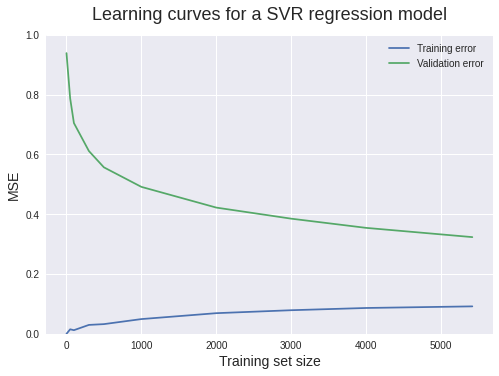

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVR regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',C = 40)
regressor.fit(X,y)

SVR(C=40, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 0.545869504593355


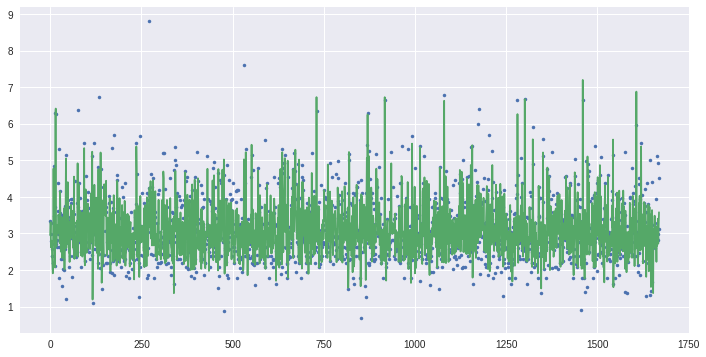

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 6))
y = np.array(y_test).reshape(-1,1)
z = regressor.predict(X_test)

ax.plot(y,'.')
ax.plot(z,'-')

#LightGBM Model

In [ ]:
params = {'learning_rate': 0.01,
          'num_leaves': 800,
          'max_depth': 20,
          "metric": 'rmse',
          "verbosity": -1,
          'reg_alpha': 0.55,
          'reg_lambda': 0.65,
          }

In [ ]:
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200,valid_sets=[train_X,lgb_valid],evals_result=evals_result,verbose_eval=100)

[100]	training's rmse: 0.690199	valid_1's rmse: 0.718807
[200]	training's rmse: 0.606786	valid_1's rmse: 0.659777
[300]	training's rmse: 0.558693	valid_1's rmse: 0.633656
[400]	training's rmse: 0.527743	valid_1's rmse: 0.618485
[500]	training's rmse: 0.506469	valid_1's rmse: 0.609197
[600]	training's rmse: 0.489111	valid_1's rmse: 0.602055
[700]	training's rmse: 0.47444	valid_1's rmse: 0.596902
[800]	training's rmse: 0.461804	valid_1's rmse: 0.592972
[900]	training's rmse: 0.450647	valid_1's rmse: 0.58989
[1000]	training's rmse: 0.440538	valid_1's rmse: 0.587188
[1100]	training's rmse: 0.43154	valid_1's rmse: 0.585492
[1200]	training's rmse: 0.42283	valid_1's rmse: 0.583653
[1300]	training's rmse: 0.41479	valid_1's rmse: 0.582377
[1400]	training's rmse: 0.407264	valid_1's rmse: 0.581238
[1500]	training's rmse: 0.400031	valid_1's rmse: 0.580053
[1600]	training's rmse: 0.393504	valid_1's rmse: 0.57927
[1700]	training's rmse: 0.387211	valid_1's rmse: 0.578599
[1800]	training's rmse: 0.381

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [ ]:
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 0.5740189157493315


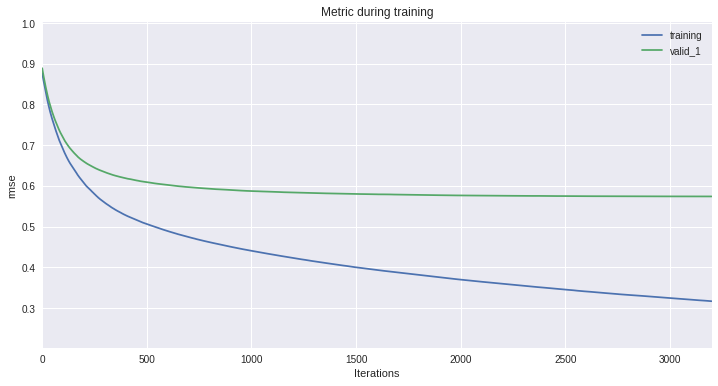

In [ ]:
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

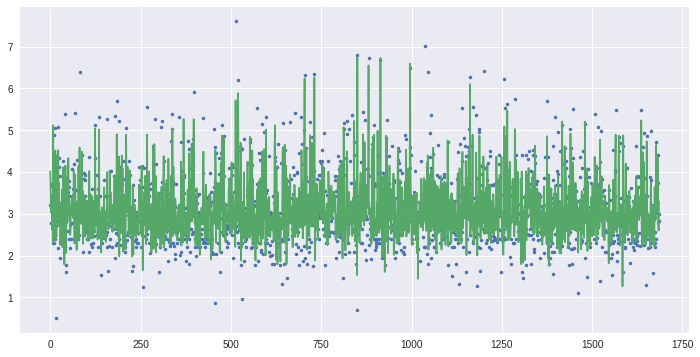

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 6))
y = np.array(y_test).reshape(-1,1)
z = gbm.predict(X_test, num_iteration=gbm.best_iteration)

ax.plot(y,'.')
ax.plot(z,'-')